In [1]:
# import das bibliotecas que serão usadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# import dos modelos que serão usados

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


## Leitura dos dados

In [2]:

df = pd.read_csv('base_final_correta.csv')
df_20 = pd.read_csv('base_final_correta_20.csv')
df_40 = pd.read_csv('base_final_correta_40.csv')
# df.drop(columns =['Unnamed: 0'],inplace = True)

In [3]:
# Função para saber o erromédio entre o previsto e o real

def med(y_true, y_pred): 
    y_true += 1e-5
    return np.median(np.abs(y_true - y_pred) / y_true)

# Regressão Linear para o Dataframe de 20 e 40 TEUS juntos

In [4]:
# Normalização do Dataframe para que se tenha apenas uma linha por cada data

df_final_1 = df[['TEU','Mes','Ano','FlagConteinerTamanho']]
df_final_2 = df[['ConteinerEstado', 'Tipo Navegação', 'Sentido' , 'Ano', 'Mes',
       'Chave_Total retail trade (Volume) sa, IndexBrazil', 'Taxa_desocupacao',
       'Cotacao_Dol','FlagConteinerTamanho','PIB','PIB growth']]

df_final_1 = df_final_1.groupby(by=['Mes','Ano','FlagConteinerTamanho']).sum().reset_index()
df_final_2 = df_final_2.groupby(by=['Mes','Ano','FlagConteinerTamanho']).mean().reset_index()

df_final = df_final_1.merge(df_final_2, how='inner', on=['Mes','Ano','FlagConteinerTamanho'])

In [5]:
# Separação em DataFrames de teste e treino que serão usados no modelo

treino = df_final.loc[(df_final['Ano'] >= 2015) & (df_final['Ano'] <= 2017)]


y_treino = treino['TEU'].values
del treino['TEU']
# del treino['Ano']
# del treino['Data']
x_treino = treino.values

#-----------------------------------------

teste = df_final.loc[(df_final['Ano'] == 2018)]


y_teste = teste['TEU'].values
del teste['TEU']
# del teste['Ano']
# del teste['Data']

x_teste = teste.values


#-----------------------------------------

del df_final['TEU']
# del df_final['Ano']
# del df_final['Data']

x_teste_df = pd.DataFrame(x_teste, columns = df_final.columns.tolist())
x_treino_df = pd.DataFrame(x_treino, columns = df_final.columns.tolist())

In [6]:
# Normalização dos dados de treino e teste utilizando o standard scaler

scaler = preprocessing.StandardScaler().fit(x_treino_df.values)

x_train_norm = scaler.transform(x_treino_df.values)
x_test_norm = scaler.transform(x_teste_df.values)


In [7]:
# Aplicação do modelo e vizualiação das métricas

reg = LinearRegression().fit(x_train_norm, y_treino)
y_pred = reg.predict(x_test_norm)
print('Total')
print('r_2_treino: ',reg.score(x_train_norm, y_treino))
print('r_2_teste: ',reg.score(x_test_norm, y_teste))
print('mean_square_erro: ',(mean_squared_error(y_teste, y_pred))**0.5)
print('média erro: ',med(y_teste,y_pred))

Total
r_2_treino:  0.6750014159260098
r_2_teste:  -0.08541664377490821
mean_square_erro:  53213.689468013035
média erro:  0.3259415548348159


TOTAL


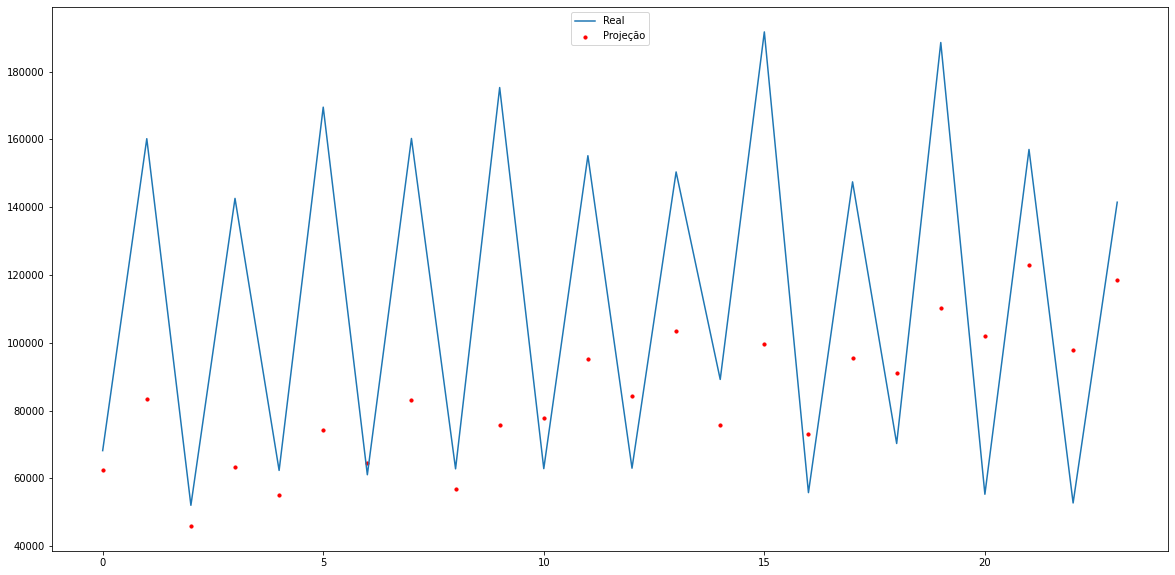

In [8]:
# Print dos resultados previstos em relação aos resultados reais

print('TOTAL')

min_index = 0
max_index = 560

fig = plt.figure(figsize=(20, 10))


ax1 = fig.add_subplot(111)

ax1.plot(x_teste_df.index[min_index:max_index], y_teste[min_index:max_index], label='Real')
ax1.scatter(x_teste_df.index[min_index:max_index], y_pred[min_index:max_index], s=10, c='r', marker="o", \
            label='Projeção')
plt.legend(loc='upper center')
plt.show()

In [9]:
# Tabela de importância das features para o modelo

print('TOTAL')
importance_df = pd.DataFrame()
importance_df['colunas'] = treino.columns.tolist()
importance_df['importancia'] = list(reg.coef_)
importance_df['importancia_abs'] = np.abs(list(reg.coef_))

importance_df = importance_df.sort_values(by='importancia_abs', ascending=False)
del importance_df['importancia_abs']

importance_df

TOTAL


,colunas,importancia
1,Ano,32056.765715
7,Taxa_desocupacao,-31599.772726
2,FlagConteinerTamanho,11827.682702
0,Mes,6645.344877
10,PIB growth,6555.206644
6,"Chave_Total retail trade (Volume) sa, IndexBrazil",-4907.120022
3,ConteinerEstado,-2031.290564
8,Cotacao_Dol,-1624.006372
9,PIB,1599.140693
5,Sentido,996.230182


In [10]:
# Tabela com os dados reais, previstos e as diferenças entre eles

analise = pd.DataFrame(y_pred,columns = ['y_pred'])
analise['y_real'] = y_teste
analise['dif_abs'] = ((analise['y_pred'] - analise['y_real'])**2)**(1/2)
analise['dif_perc'] = 100*((analise['y_pred'] - analise['y_real'])**2)**(1/2)/(analise['y_real'])
analise.head()

,y_pred,y_real,dif_abs,dif_perc
0,62362.212979,68176.00001,5813.787031,8.527615
1,83503.375625,160232.00001,76728.624385,47.885956
2,45901.092022,52036.00001,6134.907988,11.789738
3,63284.568931,142610.00001,79325.431079,55.624031
4,55023.247458,62332.00001,7308.752552,11.725522


# Regressão Linear para o Dataframe de 20 TEUS


In [11]:
# Normalização do Dataframe para que se tenha apenas uma linha por cada data

df_final_1_20 = df_20[['TEU','Mes','Ano']]
df_final_2_20 = df_20[['ConteinerEstado', 'Tipo Navegação', 'Sentido' , 'Ano', 'Mes',
       'Chave_Total retail trade (Volume) sa, IndexBrazil', 'Taxa_desocupacao',
       'Cotacao_Dol','PIB','PIB growth']]

df_final_1_20 = df_final_1_20.groupby(by=['Mes','Ano']).sum().reset_index()
df_final_2_20 = df_final_2_20.groupby(by=['Mes','Ano']).mean().reset_index()

df_final_20 = df_final_1_20.merge(df_final_2_20, how='inner', on=['Mes','Ano'])

In [12]:
# Separação em DataFrames de teste e treino que serão usados no modelo

treino_20 = df_final_20.loc[(df_final_20['Ano'] >= 2015) & (df_final_20['Ano'] <= 2017)]


y_treino_20 = treino_20['TEU'].values
del treino_20['TEU']
# del treino['Ano']
# del treino_20['Data']
x_treino_20 = treino_20.values

#-----------------------------------------

teste_20 = df_final_20.loc[(df_final_20['Ano'] == 2018)]
y_teste_20 = teste_20['TEU'].values
del teste_20['TEU']
# del teste['Ano']
# del teste_20['Data']

x_teste_20 = teste_20.values

#-----------------------------------------


del df_final_20['TEU']
# del df_final['Ano']
# del df_final_20['Data']

x_teste_df_20 = pd.DataFrame(x_teste_20, columns = df_final_20.columns.tolist())
x_treino_df_20 = pd.DataFrame(x_treino_20, columns = df_final_20.columns.tolist())

In [13]:
# Normalização dos dados de treino e teste utilizando o standard scaler

scaler_20 = preprocessing.StandardScaler().fit(x_treino_df_20.values)

x_train_norm_20 = scaler_20.transform(x_treino_df_20.values)
x_test_norm_20 = scaler_20.transform(x_teste_df_20.values)


In [14]:
# Aplicação do modelo e vizualiação das métricas

reg_20 = LinearRegression().fit(x_train_norm_20, y_treino_20)
y_pred_20 = reg_20.predict(x_test_norm_20)
print('20 TEU')
print('r_2_treino: ', reg_20.score(x_train_norm_20, y_treino_20))
print('r_2_teste: ', reg_20.score(x_test_norm_20, y_teste_20))
print('mean_square_erro: ',(mean_squared_error(y_teste_20, y_pred_20))**0.5)
print('média erro: ',med(y_teste_20,y_pred_20))

20 TEU
r_2_treino:  0.7608958223701925
r_2_teste:  -1.3088630470477631
mean_square_erro:  32603.477167952304
média erro:  0.24689989834057852


20 TEUS


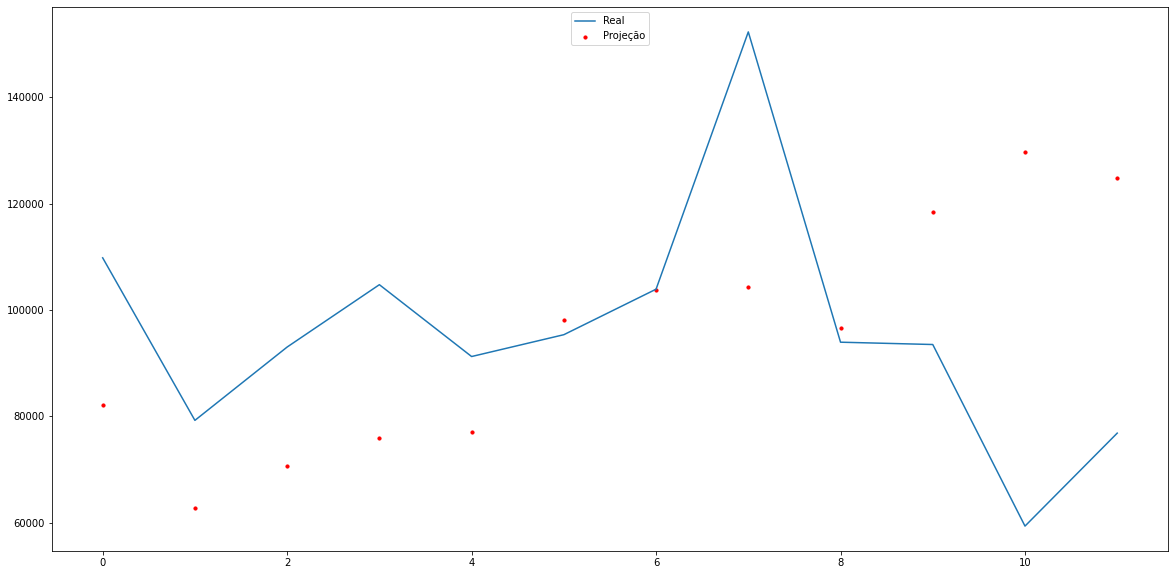

In [15]:
# Print dos resultados previstos em relação aos resultados reais


print('20 TEUS')
min_index = 0
max_index = 560

fig = plt.figure(figsize=(20, 10))


ax1 = fig.add_subplot(111)

ax1.plot(x_teste_df_20.index[min_index:max_index], y_teste_20[min_index:max_index], label='Real')
ax1.scatter(x_teste_df_20.index[min_index:max_index], y_pred_20[min_index:max_index], s=10, c='r', marker="o", \
            label='Projeção')
plt.legend(loc='upper center')
plt.show()

# Regressão Linear para o Dataframe de 40 TEUS

In [16]:
# Normalização do Dataframe para que se tenha apenas uma linha por cada data

df_final_1_40 = df_40[['TEU','Mes','Ano']]

df_final_2_40 = df_40[['ConteinerEstado', 'Tipo Navegação', 'Sentido' , 'Ano', 'Mes',
       'Chave_Total retail trade (Volume) sa, IndexBrazil', 'Taxa_desocupacao',
       'Cotacao_Dol','PIB','PIB growth']]

df_final_1_40 = df_final_1_40.groupby(by=['Mes','Ano']).sum().reset_index()
df_final_2_40 = df_final_2_40.groupby(by=['Mes','Ano']).mean().reset_index()
df_final_40 = df_final_1_40.merge(df_final_2_40, how='inner', on=['Mes','Ano'])

In [17]:
# Separação em DataFrames de teste e treino que serão usados no modelo


treino_40 = df_final_40.loc[(df_final_40['Ano'] >= 2015) & (df_final_40['Ano'] <= 2017)]


y_treino_40 = treino_40['TEU'].values
del treino_40['TEU']
# del treino['Ano']
# del treino_20['Data']
x_treino_40 = treino_40.values

#-----------------------------------------

teste_40 = df_final_40.loc[(df_final_40['Ano'] == 2018)]


y_teste_40 = teste_40['TEU'].values
del teste_40['TEU']
# del teste['Ano']
# del teste_20['Data']

x_teste_40 = teste_40.values

#-----------------------------------------

del df_final_40['TEU']
# del df_final['Ano']
# del df_final_20['Data']

x_teste_df_40 = pd.DataFrame(x_teste_40, columns = df_final_40.columns.tolist())
x_treino_df_40 = pd.DataFrame(x_treino_40, columns = df_final_40.columns.tolist())

In [18]:
# Normalização dos dados de treino e teste utilizando o standard scaler

scaler_40 = preprocessing.StandardScaler().fit(x_treino_df_40.values)

x_train_norm_40 = scaler_40.transform(x_treino_df_40.values)
x_test_norm_40 = scaler_40.transform(x_teste_df_40.values)

In [19]:
# Aplicação do modelo e vizualiação das métricas

reg_40 = LinearRegression().fit(x_train_norm_40, y_treino_40)
y_pred_40 = reg_40.predict(x_test_norm_40)
print('40 TEU')
print('r_2_treino: ', reg_40.score(x_train_norm_40, y_treino_40))
print('r_2_teste: ', reg_40.score(x_test_norm_40, y_teste_40))
print('mean_square_erro: ',(mean_squared_error(y_teste_40, y_pred_40))**0.5)
print('média erro: ',med(y_teste_40,y_pred_40))

40 TEU
r_2_treino:  0.5726594204546462
r_2_teste:  -7.638278077660015
mean_square_erro:  51666.59402605533
média erro:  0.3464401161593732


40 TEUS


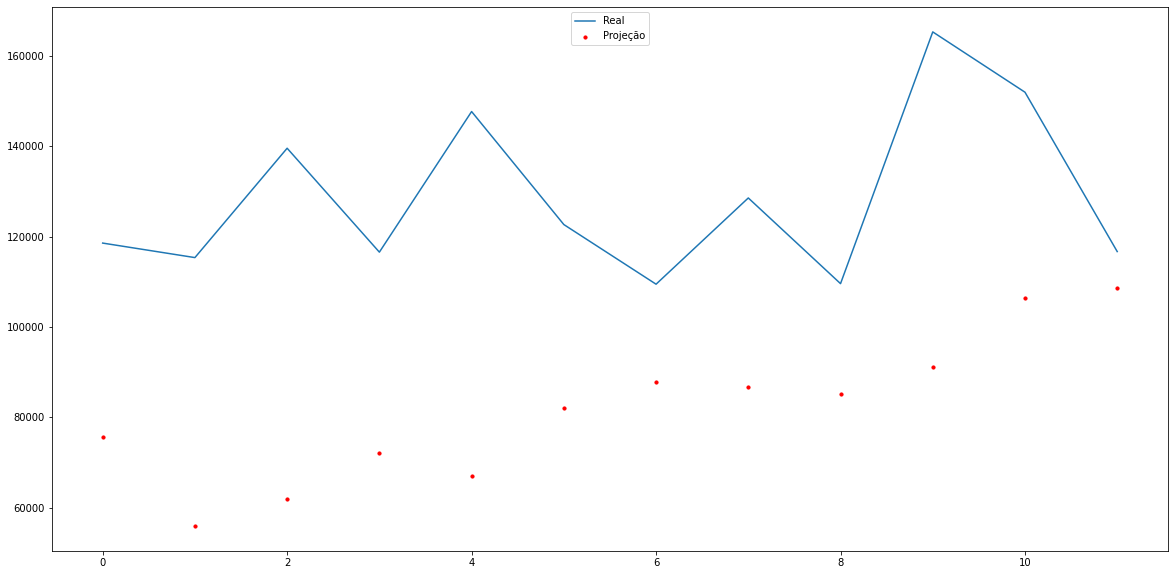

In [20]:
# Print dos resultados previstos em relação aos resultados reais

print('40 TEUS')
min_index = 0
max_index = 560

fig = plt.figure(figsize=(20, 10))


ax1 = fig.add_subplot(111)

ax1.plot(x_teste_df_40.index[min_index:max_index], y_teste_40[min_index:max_index], label='Real')
ax1.scatter(x_teste_df_40.index[min_index:max_index], y_pred_40[min_index:max_index], s=10, c='r', marker="o", \
            label='Projeção')
plt.legend(loc='upper center')
plt.show()

# Árvore de decisão 

In [21]:


print ('Decision Tree')

clf = DecisionTreeRegressor()
clf.fit(x_treino_df, y_treino)
pred = clf.predict(x_teste_df)
score_teste = clf.score(x_teste_df, y_teste)
score_treino = clf.score(x_treino_df, y_treino)
print('TOTAL')
print("R-squared_treino:", score_treino) 
print("R-squared_teste:", score_teste) 
mse = mean_squared_error(y_teste, pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print('Média de erro: ',med(y_teste,pred))

Decision Tree
TOTAL
R-squared_treino: 1.0
R-squared_teste: -0.9771646031949084
MSE:  5158139601.839821
RMSE:  71820.18937485351
Média de erro:  0.6119651174708509


In [22]:
print ('Decision Tree')

clf_20 = DecisionTreeRegressor()
clf_20.fit(x_treino_df_20, y_treino_20)
pred_20 = clf_20.predict(x_teste_df_20)
score_teste_20 = clf_20.score(x_teste_df_20, y_teste_20)
score_treino_20= clf_20.score(x_treino_df_20, y_treino_20)
print('20 TEU')
print("R-squared_treino:", score_treino_20) 
print("R-squared_teste:", score_teste_20) 
mse = mean_squared_error(y_teste_20, pred_20)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print('Média de erro: ',med(y_teste_20,pred_20))

Decision Tree
20 TEU
R-squared_treino: 1.0
R-squared_teste: -2.6444602255232494
MSE:  1677887668.042593
RMSE:  40962.02714762287
Média de erro:  0.20083630556083862


In [23]:


print ('Decision Tree')

clf_40 = DecisionTreeRegressor()
clf_40.fit(x_treino_df_40, y_treino_40)
pred_40 = clf_40.predict(x_teste_df_40)
score_teste_40 = clf_40.score(x_teste_df_40, y_teste_40)
score_treino_40= clf_40.score(x_treino_df_40, y_treino_40)
print('40 TEU')
print("R-squared_treino:", score_treino_40) 
print("R-squared_teste:", score_teste_40) 
mse = mean_squared_error(y_teste_40, pred_40)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print('Média de erro: ',med(y_teste_40,pred_40))

Decision Tree
40 TEU
R-squared_treino: 1.0
R-squared_teste: -12.549321557558029
MSE:  4187068201.422575
RMSE:  64707.559074829696
Média de erro:  0.29495455229177314
